# 안녕하세요^^ 
## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

## 기본전제

[기본 데이터]
* 1.2 seoul_moving_month_4.csv

[데이터 소개]
* 서울 시 구별 이동 2022년 4월 데이터

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_4_step1.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 '1.2 seoul_moving_month_4.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요
        * index column은 0번 열 입니다

In [89]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd

seoul_moving = pd.read_csv('데이터/1.2 seoul_moving_month_4.csv', sep=',', encoding='UTF-8', index_col=0)

In [90]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(28923054, 10)

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [91]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.describe

<bound method NDFrame.describe of           대상연월 요일  도착시간  출발 시군구 코드  도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
0       202204  일     0      11010      11010  F   0   EE           10   28.02
1       202204  일     0      11010      11010  F   0   EH           10   27.52
2       202204  일     0      11010      11010  F   0   HE           10   27.83
3       202204  일     0      11010      11010  F  10   HW           10    6.05
4       202204  일     0      11010      11010  F  10   EH           90    5.95
...        ... ..   ...        ...        ... ..  ..  ...          ...     ...
968458  202204  토    23      39000      11250  M  45   EH           50    3.16
968459  202204  토    23      39000      11250  M  50   EH           70    3.27
968460  202204  토    23      39000      11250  M  55   EE           50    3.31
968461  202204  토    23      39000      11250  M  55   EH           50    3.28
968462  202204  토    23      39000      11250  M  75   EH           30    5.94

[28923054 rows x 

In [92]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.4+ GB


In [93]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


* 1번 열의 의미
    * " 2022년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 27.52명이며 이들의 평균 이동시간은 10분이다

#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '인구이동(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)

    - 해당 값을 나름의 기준으로 변경하세요

    - '인구이동(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [94]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. (Hint : value_counts())
seoul_moving['이동인구(합)'].value_counts()

*          3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: 이동인구(합), Length: 135812, dtype: int64

In [95]:
# 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체
seoul_moving.replace('*', '1.5', inplace=True)

In [96]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['이동인구(합)'].value_counts()

1.5        3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: 이동인구(합), Length: 135812, dtype: int64

In [97]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
# astype
seoul_moving = seoul_moving.astype({'이동인구(합)':'float'})
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.4+ GB


#### [실습문제4] 이동유형, 요일, 성별 변수의 value수를 파악

* 역시나 value_counts()를 활용해 봅시다.

In [98]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['이동유형'].value_counts()

EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: 이동유형, dtype: int64

In [99]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['요일'].value_counts()

토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: 요일, dtype: int64

* 4월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 4, 금 : 5, 토 : 5

In [100]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['성별'].value_counts()

M    16355029
F    12568025
Name: 성별, dtype: int64

#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [101]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 0:00~ 4:59 (0, 1, 2, 3, 4)
seoul_moving_night = seoul_moving[seoul_moving['도착시간'] < 5]
seoul_moving_night['요일'].value_counts()
# 토요일이 가장 많음


토    423995
금    359012
일    331392
목    308651
수    303357
화    292786
월    273062
Name: 요일, dtype: int64

#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다!

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [102]:
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [103]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 복사를 하지 않고 실제 데이터에 바로 and 조건을 걸으니 잘못했을 때 0으로 수렴하는 것이 할당되어 모든 데이터가 날아가버린다.. 복사해서 하자 주의!!!
seoul_moving2 = seoul_moving[(seoul_moving['출발 시군구 코드'] < 20000) & (seoul_moving['도착 시군구 코드'] < 20000)]
seoul_moving = seoul_moving2
seoul_moving


,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,11250,11250,M,80,WH,10,85.10
920411,202204,토,23,11250,11250,M,80,EH,10,28.36
920412,202204,토,23,11250,11250,M,80,EE,20,37.99
920413,202204,토,23,11250,11250,M,80,HE,10,9.42


#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [104]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. (출발 시군구 코드)
# 유출이 제일 많고 적은 구는?
# seoul_moving.groupby(by=['출발 시군구 코드'], as_index=False)['이동인구(합)'].sum().sort_values(by=['이동인구(합)'], ascending=False)
seoul_moving.groupby(by=['출발 시군구 코드'], as_index=False)['이동인구(합)'].sum()
# 유츨 많다 - 강남, 유출 적다 - 금천

,출발 시군구 코드,이동인구(합)
0,11010,19862431.70
1,11020,20296645.78
2,11030,15148400.31
3,11040,18121271.09
4,11050,18675122.83
5,11060,16973103.47
6,11070,14509927.80
7,11080,19558088.65
8,11090,13084060.28
9,11100,11253816.27


In [105]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. (도착 시군구 코드)
# 유입이 가장 많고 적은 구는?
# seoul_moving.groupby(by=['도착 시군구 코드'], as_index=False)['이동인구(합)'].sum().sort_values(by=['이동인구(합)'], ascending=False)
seoul_moving.groupby(by=['도착 시군구 코드'], as_index=False)['이동인구(합)'].sum()

,도착 시군구 코드,이동인구(합)
0,11010,19809988.63
1,11020,20275545.43
2,11030,15247193.24
3,11040,18076235.50
4,11050,18715186.44
5,11060,16987577.97
6,11070,14518503.71
7,11080,19524264.96
8,11090,13079023.71
9,11100,11243990.02


#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [106]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_moving = seoul_moving[seoul_moving['도착시간'] >= 5]
seoul_moving.reset_index(drop=True, inplace=True)


In [107]:
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,5,11010,11010,F,10,HE,10,5.96
1,202204,일,5,11010,11010,F,10,WH,10,5.88
2,202204,일,5,11010,11010,F,15,HE,10,4.06
3,202204,일,5,11010,11010,F,15,EW,10,4.06
4,202204,일,5,11010,11010,F,15,EH,10,10.08
...,...,...,...,...,...,...,...,...,...,...
9555933,202204,토,23,11250,11250,M,80,WH,10,85.10
9555934,202204,토,23,11250,11250,M,80,EH,10,28.36
9555935,202204,토,23,11250,11250,M,80,EE,20,37.99
9555936,202204,토,23,11250,11250,M,80,HE,10,9.42


#### [실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [108]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving_mean = seoul_moving.groupby('도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].mean()
seoul_moving_mean


,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,21.349599,44.235978
1,11020,21.012462,44.516072
2,11030,21.364786,36.903883
3,11040,21.740324,42.685596
4,11050,22.474283,46.762548
5,11060,21.673451,39.942708
6,11070,23.412789,41.012753
7,11080,22.160283,45.816273
8,11090,23.811274,39.128470
9,11100,24.489976,37.882283


In [109]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving_sum = seoul_moving.groupby('도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].sum()
seoul_moving_sum


,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,9356120,19385709.60
1,11020,9306020,19715322.61
2,11030,8514380,14707082.87
3,11040,8887140,17449273.95
4,11050,8625540,17947278.99
5,11060,8838130,16288077.28
6,11070,7939300,13907465.59
7,11080,9072420,18757182.35
8,11090,7649610,12570412.30
9,11100,6995880,10821566.75


In [110]:
# 컬럼명을 변경해볼까요?
seoul_moving_sum.rename(columns={'평균 이동 시간(분)':'총 이동 시간', '이동인구(합)':'총 이동 인구'}, inplace=True)

In [111]:
seoul_moving_sum

,도착 시군구 코드,총 이동 시간,총 이동 인구
0,11010,9356120,19385709.60
1,11020,9306020,19715322.61
2,11030,8514380,14707082.87
3,11040,8887140,17449273.95
4,11050,8625540,17947278.99
5,11060,8838130,16288077.28
6,11070,7939300,13907465.59
7,11080,9072420,18757182.35
8,11090,7649610,12570412.30
9,11100,6995880,10821566.75


In [112]:
# 파일을 합쳐볼까요
df_seoul_moving = pd.merge(seoul_moving_sum, seoul_moving_mean, how = 'inner', on = '도착 시군구 코드')

In [113]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장하세요
df_seoul_moving.to_csv("df_seoul_moving.csv", index = False)

---

In [137]:
df_seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   도착 시군구 코드    25 non-null     int64  
 1   총 이동 시간      25 non-null     int64  
 2   총 이동 인구      25 non-null     float64
 3   평균 이동 시간(분)  25 non-null     float64
 4   이동인구(합)      25 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.2 KB


In [143]:
df_seoul_moving['도착 시군구 코드'] = df_seoul_moving['도착 시군구 코드'].astype(str)
df_seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   도착 시군구 코드    25 non-null     object 
 1   총 이동 시간      25 non-null     int64  
 2   총 이동 인구      25 non-null     float64
 3   평균 이동 시간(분)  25 non-null     float64
 4   이동인구(합)      25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.2+ KB


# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [145]:
df_seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   도착 시군구 코드    25 non-null     object 
 1   총 이동 시간      25 non-null     int64  
 2   총 이동 인구      25 non-null     float64
 3   평균 이동 시간(분)  25 non-null     float64
 4   이동인구(합)      25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.2+ KB


<Figure size 2000x400 with 0 Axes>

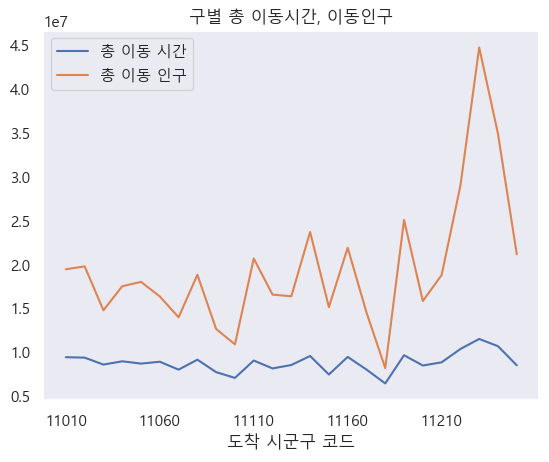

In [159]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 구별 총 이동시간, 이동인구
plt.figure(figsize=(20, 4))
df_seoul_moving.plot(x = '도착 시군구 코드', y = ['총 이동 시간','총 이동 인구']
          , title = '구별 총 이동시간, 이동인구')
plt.rc('font', size=10) 
plt.grid()
plt.show()

<Figure size 2000x400 with 0 Axes>

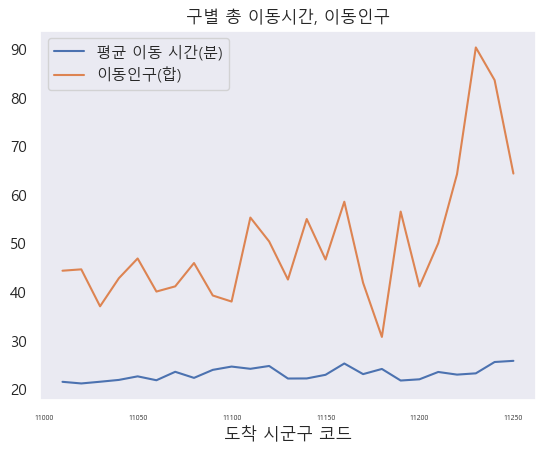

In [136]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 구별 총 이동 인구
plt.figure(figsize=(20, 4))
df_seoul_moving.plot(x = '도착 시군구 코드', y = ['평균 이동 시간(분)','이동인구(합)']
          , title = '구별 총 이동시간, 이동인구')
plt.xticks(fontsize=5)
plt.grid()
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 강남구의 이동인구(합)이 가장 높고, 용산구의 이동인구가 가장 적다.
# 2. 총 이동 시간은 강남구가 가장 높고, 금천구의 이동 시간이 가장 낮다.
# 3. 

---